<a href="https://colab.research.google.com/github/Abd-elr4hman/Machine-Learning-alogarithms/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
x,y= datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
print(x.shape)
print(y.shape)
y=np.where(y==0, -1, 1)

(50, 2)
(50,)


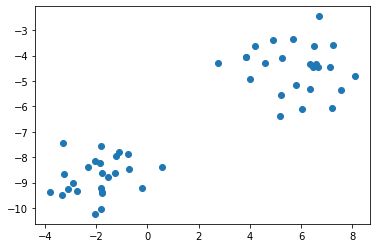

In [3]:
fig, ax= plt.subplots()
ax.scatter(x[:,0],x[:, 1])

In [4]:
class SVM:
  def __init__(self, lr= 0.001,lambda_param=0.01, iterations=1000):
    self.lr= lr 
    self.lambda_param= lambda_param
    self.iterations= iterations
    self.w= None
    self.b= None

  def fit(self, x, y):
    n_examples, n_features= x.shape
    self.w= np.zeros(n_features)
    self.b= np.zeros(1)

    for _ in range(self.iterations):
      for index, x_i in enumerate(x):
        condition= y[index] * (np.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -= self.lr * (2 * self.lambda_param * self.w)
        else:
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[index]))
          self.b -= self.lr * y[index]
  
  def predict(self, x):
    linear_poly= np.dot(x, self.w) - self.b
    return np.sign(linear_poly)

(50, 2)
(50,)


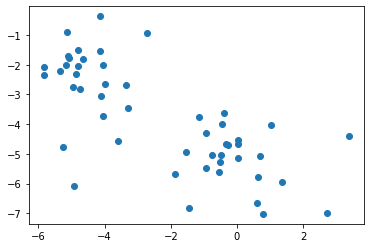

In [5]:
margin_classifier= SVM()
margin_classifier.fit(x, y)

x_test,y_test= datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=50)
print(x.shape)
print(y.shape)
y_test=np.where(y==0, -1, 1)

fig, ax= plt.subplots()
ax.scatter(x_test[:,0],x_test[:, 1])



In [6]:
prediction= margin_classifier.predict(x_test)
print(prediction.shape)

(50,)


In [ ]:
def accuracy(y_true, y_pred):
  accuracy= np.sum(y_true==y_pred)/ len(y_true)
  return accuracy

print("accuracy= {}".format(accuracy(y_test, prediction)))